In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# importing specific library
# We will need the ccxt library. To install it using Anaconda, in a shell windown:
#    $ source activate base
#    (base)$ pip install ccxt
import ccxt
from arbitrage import get_price_data, merge_dfs_on_column

In [4]:
# We will download data from Binance, bittrex, Exmo, Gemini:
exchanges = ['binance', 'bittrex', 'exmo', 'gemini']

# Loading all exchanges' markets
exchange_instances = []
for exchange in exchanges:
    exchange_inst = getattr(ccxt, exchange)()
    exchange_inst.load_markets()
    exchange_instances.append(exchange_inst)

# We will import data for BTC/ETH, BTC/USD, ETH/USD, ETH/BTC, USD/BTC, USD/ETH:
symbols = ['BTC/ETH', 'BTC/USD', 'ETH/USD', 'ETH/BTC', 'USD/BTC', 'USD/ETH']

# check which exchange provides which exchange rates:
available_markets = [(exch.id, symbol) for exch in exchange_instances for symbol in symbols if symbol in exch.markets]
print(available_markets)

# we will save data in a cache on the local drive, in the data directory in the same location as this notebook:
import os
cache_dir = os.getcwd() + '/data'

# Actual download:
prices_daily = get_price_data(symbols, exchanges, env={'cache_dir':cache_dir, 'start_date':'2017-07-20'})

for exchange, df in prices_daily.items():
    print("Exchange: {} from {} to {}".format(exchange, min(df.index), max(df.index)))
    print(df.head())

[('binance', 'ETH/BTC'), ('bittrex', 'ETH/BTC'), ('exmo', 'BTC/USD'), ('exmo', 'ETH/USD'), ('exmo', 'ETH/BTC'), ('gemini', 'BTC/USD'), ('gemini', 'ETH/USD'), ('gemini', 'ETH/BTC')]
Exchange: binance from 2017-07-20 00:00:00 to 2018-03-04 00:00:00
             ETH/BTC
2017-07-20  0.080509
2017-07-21  0.081581
2017-07-22  0.082474
2017-07-23  0.083533
2017-07-24  0.083161
Exchange: bittrex from 2017-07-20 00:00:00 to 2018-03-04 00:00:00
             ETH/BTC
2017-07-20  0.079925
2017-07-21  0.081576
2017-07-22  0.081850
2017-07-23  0.083300
2017-07-24  0.081510
Exchange: exmo from 2018-03-04 00:00:00 to 2018-03-04 00:00:00
                 BTC/USD  ETH/USD  ETH/BTC
2018-03-04  11564.997687    874.0   0.0755
Exchange: gemini from 2018-03-04 00:00:00 to 2018-03-04 00:00:00
             BTC/USD  ETH/USD  ETH/BTC
2018-03-04  11428.49    867.0  0.07557


In [5]:
# Exmo and Gemini do not provide price history so we will only use binance and bittrex
arbitrage_df = merge_dfs_on_column([prices_daily['binance'], prices_daily['bittrex']], ['Binance', 'Bittrex'], 'ETH/BTC')
arbitrage_df['Difference'] = arbitrage_df['Binance'] - arbitrage_df['Bittrex']
print(arbitrage_df.head())

             Binance   Bittrex  Difference
2017-07-20  0.080509  0.079925    0.000584
2017-07-21  0.081581  0.081576    0.000005
2017-07-22  0.082474  0.081850    0.000624
2017-07-23  0.083533  0.083300    0.000233
2017-07-24  0.083161  0.081510    0.001651


Text(0.5,0,'ETH/BTC')

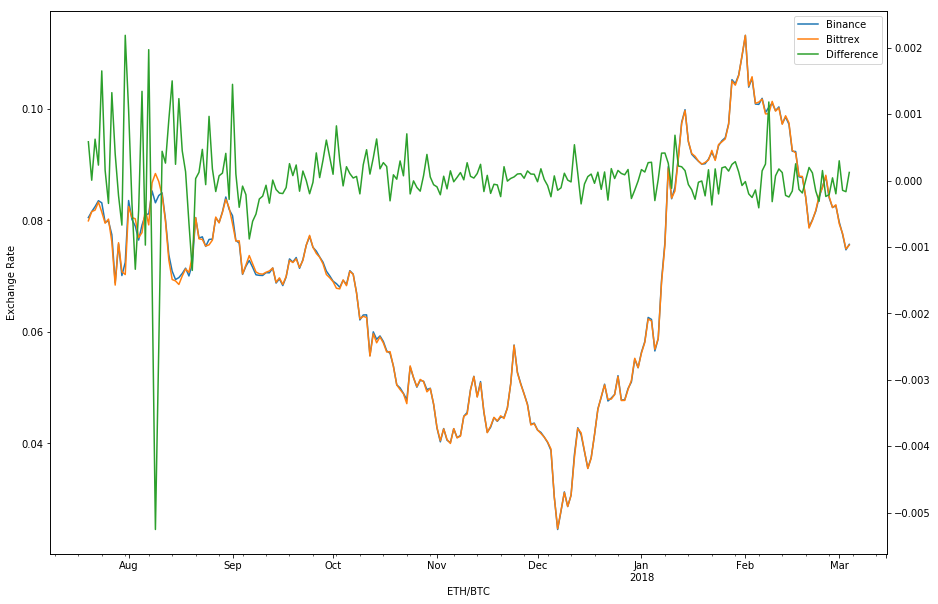

In [14]:
ax = arbitrage_df.plot(secondary_y=['Difference'], mark_right=False, figsize=(15,10))
ax.set_ylabel('Exchange Rate')
ax.set_xlabel('ETH/BTC')